In [ ]:
#Step-1: Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Step-2: Load Dataset

df = pd.read_csv('netflix.csv')

In [ ]:
#Step-3: Gather basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Check missing values
df.isnull().sum()

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Extract year and month for analysis
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September


##**BUSINESS-ORIENTED ANALYSIS QUESTIONS**

###**1.** Content Strategy

**Q1.** What is the ratio of Movies v/s TV Shows on Netflix?

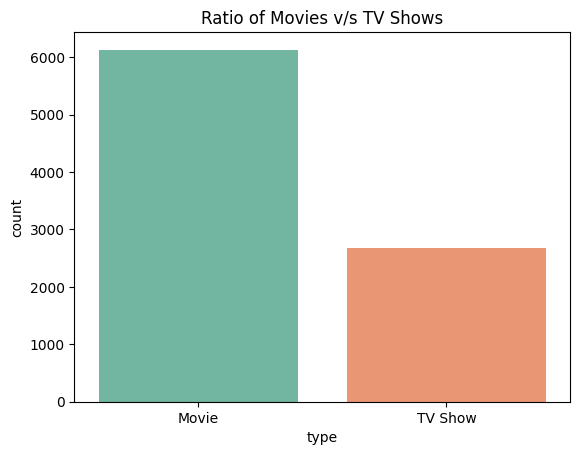

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='type', data=df, palette='Set2', hue='type')
plt.title('Ratio of Movies v/s TV Shows')
plt.show()

ratio = df['type'].value_counts(normalize=True) * 100
print(ratio)

**Insights:**
1. Movies dominate the catalog, indicating Netflix's heavier focus on film content (~70%).
2. This indicates Netflix's historical focus on films, though recent years show rising TV content.

**Recommendation:** Netflix should continue expanding TV Show production to improve viewer retention and episodic engagement.

**Q2.** Which genres are most popular on Netflix globally?

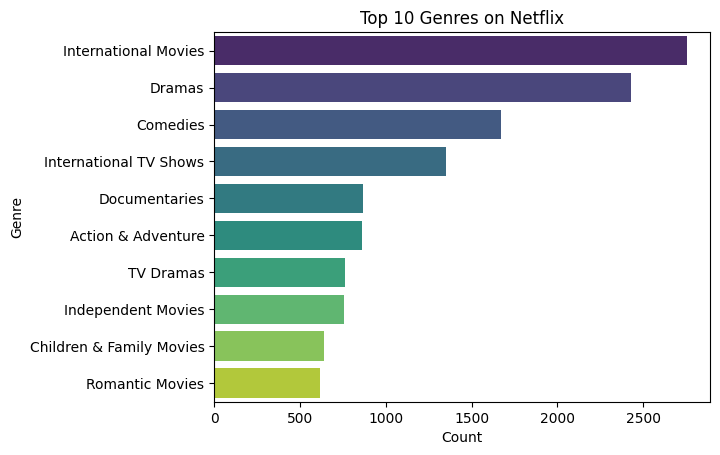

In [ ]:
from collections import Counter
genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [g for sublist in genres for g in sublist]
genre_count = Counter(flat_genres)

top_genres = pd.DataFrame(genre_count.most_common(10), columns=['Genre','Count'])
sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis', hue='Genre')
plt.title("Top 10 Genres on Netflix")
plt.show()

**Insights:**
1. Drama, Comedy, and Documentaries are most prevalent worldwide.
2. These genres cater to diverse age groups and cultural preferences, ensuring broad appeal.

**Recommendation:** Netflix should invest more in Drama & Comedy, while experimenting with emerging genres like Crime & Sci-Fi.

**Q3.** Which years saw the highest release of content on Netflix?

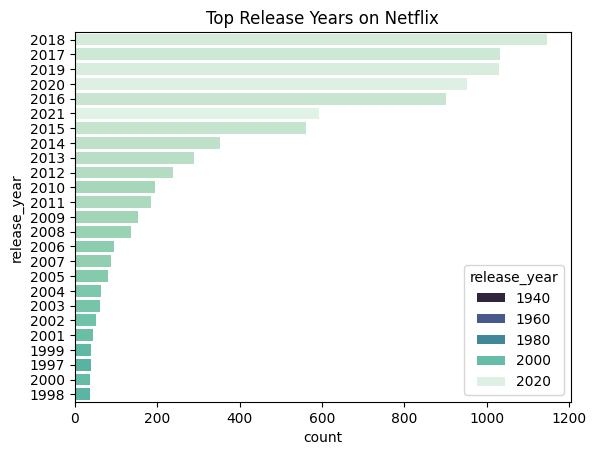

In [ ]:
sns.countplot(y='release_year', data=df,
              order=df['release_year'].value_counts().index[:25],
              palette='mako', hue='release_year')
plt.title("Top Release Years on Netflix")
plt.show()

**Insight:**
1. Recent years (2017-2020) saw the highest surge in new releases.
2. This period reflects Netflix's aggressive global content expansion strategy.

**Recommendation:** Maintain consistent annual releases to retain user interest, especially in emerging international markets.

**Q4.** Which countries produce the most Netflix content?

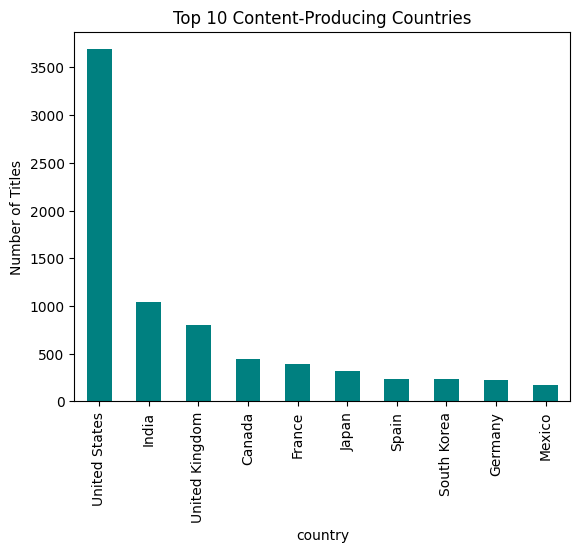

In [ ]:
countries = df['country'].dropna().str.split(', ').explode()
top_countries = countries.value_counts().head(10)

top_countries.plot(kind='bar', color='teal')
plt.title("Top 10 Content-Producing Countries")
plt.ylabel("Number of Titles")
plt.show()

**Insights:**
1. The U.S. leads in content volume, followed by India and the U.K.
2. Asian markets like South Korea and Japan are emerging fast in producing localized content.

**Recommendation:** Strengthen partnerships with local creators in high-growth countries like India & South Korea.

**Q5.** How has the trend of adding new content evolved year by year?

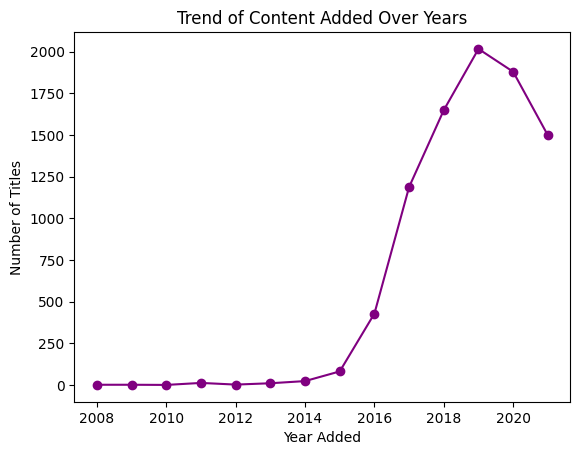

In [ ]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Extract year and month for analysis
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='purple')
plt.title("Trend of Content Added Over Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

**Insights:**
1. Content addition grew rapidly from 2015-2020, showing platform expansion.
2. The growth trend mirrors Netflix's expansion into new languages and countries.

**Recommendation:** Continue leveraging analytics to identify underrepresented genres and regions for future content growth.

###**2.** User Demographics & Targeting

**Q6.** Which ratings (e.g., TV-MA, PG, etc.) are most frequent on Netflix?

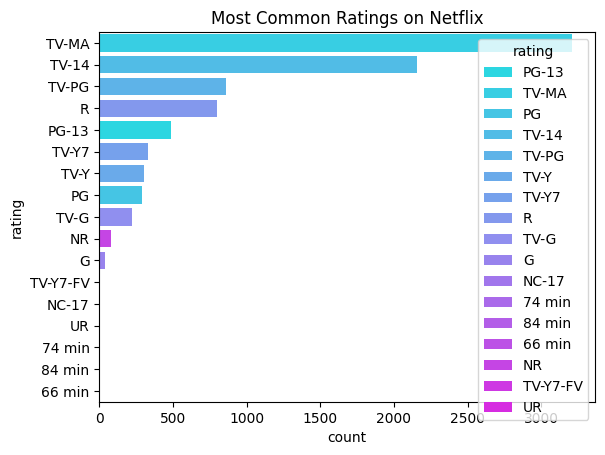

In [ ]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='cool', hue='rating')
plt.title("Most Common Ratings on Netflix")
plt.show()

**Insights:**
1. TV-MA dominates, targeting mature audiences.
2. Netflix primarily targets young adults and mature audiences.

**Recommendation:** Introduce more balanced content for family and kids to expand market reach.

**Q7.** Do some countries tend to produce more mature content (TV-MA)?

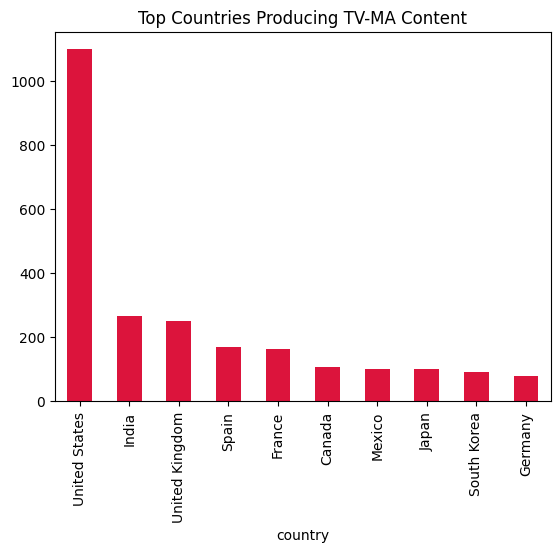

In [ ]:
tv_ma = df[df['rating'] == 'TV-MA']
tv_ma_countries = tv_ma['country'].dropna().str.split(', ').explode().value_counts().head(10)
tv_ma_countries.plot(kind='bar', color='crimson')
plt.title("Top Countries Producing TV-MA Content")
plt.show()

**Insights:**
1. The U.S. and India top mature-content production, hinting at diverse adult audience bases.
2. Mature themes are more accepted in markets with strong streaming consumption habits.

**Recommendation:** Localize mature-themed content responsibly while maintaining cultural sensitivity across regions.

**Q8.** Which genres are more associated with TV Shows v/s Movies?

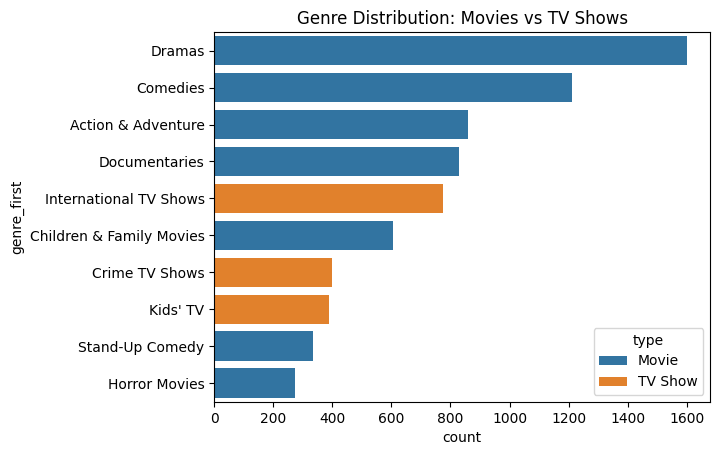

In [ ]:
df['genre_first'] = df['listed_in'].str.split(',').str[0]
sns.countplot(y='genre_first', hue='type', data=df, order=df['genre_first'].value_counts().index[:10])
plt.title("Genre Distribution: Movies vs TV Shows")
plt.show()

**Insights:**
1. TV Shows skew toward Drama/Reality; Movies lean toward Action/Comedy.
2. Movies primarily lean toward Action, Comedy and Documentaries.

**Recommendation:** Develop cross-format franchises (e.g., spin-offs or prequels) that connect popular movies with series.

**Q9.** Which genres dominate the U.S. vs other countries?

In [ ]:
us = df[df['country'].notna() & df['country'].str.contains("United States")]
other = df[df['country'].isna() | ~df['country'].str.contains("United States", na=False)]

us_genres = Counter([g for sub in us['listed_in'].dropna().str.split(', ') for g in sub])
other_genres = Counter([g for sub in other['listed_in'].dropna().str.split(', ') for g in sub])

print("Top US Genres:", us_genres.most_common(5))
print("Top Non-US Genres:", other_genres.most_common(5))

Top US Genres: [('Dramas', 835), ('Comedies', 680), ('Documentaries', 512), ('Action & Adventure', 404), ('Independent Movies', 390)]
Top Non-US Genres: [('International Movies', 2586), ('Dramas', 1592), ('International TV Shows', 1277), ('Comedies', 994), ('TV Dramas', 531)]


**Insight:**
1. U.S. content emphasizes Drama/Comedies, whereas global content varies by region.
2. Non-U.S. countries dominate International Dramas and Romantic series.

**Recommendation:** Tailor promotional campaigns by region - highlight cultural genres for local audiences.

**Q10.**  What genres are most popular in the last 3 years?

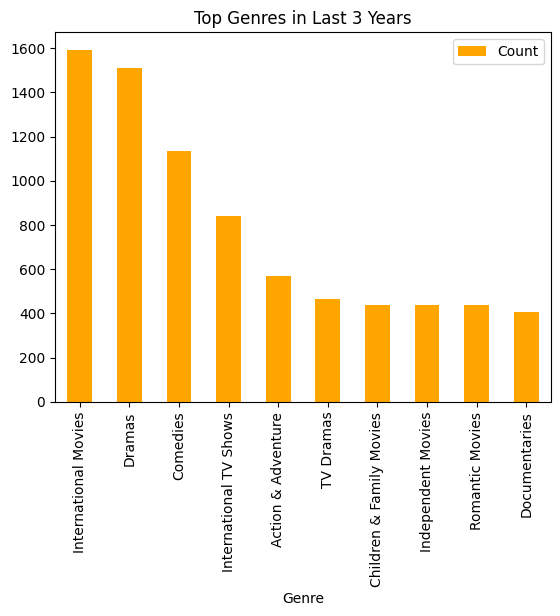

In [ ]:
recent = df[df['year_added'] >= (df['year_added'].max() - 2)]
recent_genres = Counter([g for sub in recent['listed_in'].dropna().str.split(', ') for g in sub])
pd.DataFrame(recent_genres.most_common(10), columns=['Genre','Count']).plot.bar(x='Genre', y='Count', color='orange')
plt.title("Top Genres in Last 3 Years")
plt.show()

**Insights:**
1. Recent trends show increased focus on International Dramas & Reality TV.
2. Viewer demand has shifted toward region-specific and real-life stories.

**Recommendation:** Invest in fresh, localized storytelling formats with cross-cultural appeal.

###**3.** Talent Acquisition & Partnerships

**Q11.** Who are the top 10 directors with the most Netflix content?

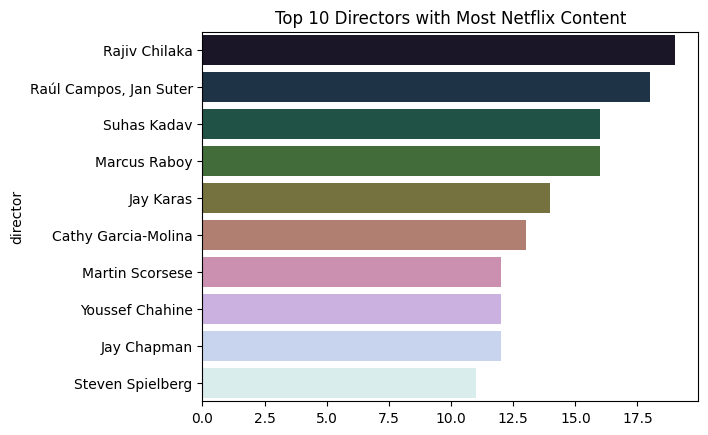

In [ ]:
top_directors = df['director'].dropna().value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix', hue=top_directors.index)
plt.title("Top 10 Directors with Most Netflix Content")
plt.show()

**Insights:**
1. Directors like Rajiv Chilaka and Raul Campos frequently produce content for Netflix.
2. These directors specialize in family and comedy genres, respectively.

**Recommendation:** Continue long-term collaborations with proven directors and nurture new regional talent.

**Q12.**  Which actors appear most frequently in Netflix shows?

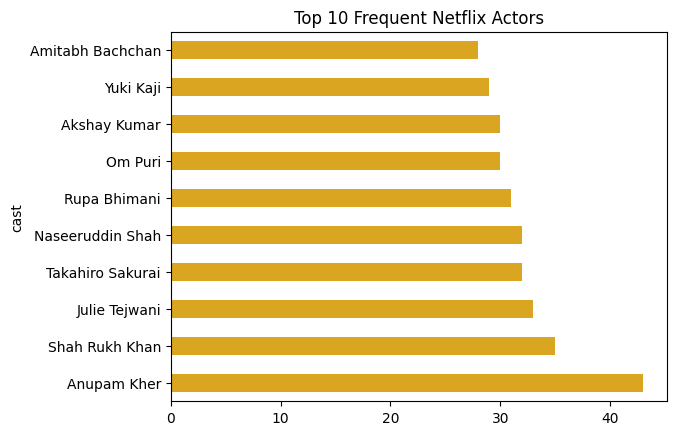

In [ ]:
actors = df['cast'].dropna().str.split(', ').explode().value_counts().head(10)
actors.plot(kind='barh', color='goldenrod')
plt.title("Top 10 Frequent Netflix Actors")
plt.show()

**Insights:**
1. Certain actors appear frequently, often in Netflix Originals or localized productions, boosting viewership.
2. Frequent collaborations with popular local actors help Netflix connect with audiences.

**Recommendation:** Expand partnerships with globally recognized and emerging actors to strengthen regional popularity.

**Q13.** Which director-genre pairs are most frequent?

In [ ]:
pairs = df[['director','listed_in']].dropna()
pairs['genre_first'] = pairs['listed_in'].str.split(',').str[0]
top_pairs = pairs.value_counts(['director','genre_first']).head(10)
top_pairs

,,count
director,genre_first,
Rajiv Chilaka,Children & Family Movies,19
"Raúl Campos, Jan Suter",Stand-Up Comedy,18
Suhas Kadav,Children & Family Movies,16
Marcus Raboy,Stand-Up Comedy,15
Jay Karas,Stand-Up Comedy,13
Jay Chapman,Stand-Up Comedy,11
Don Michael Paul,Action & Adventure,9
Shannon Hartman,Stand-Up Comedy,8
Hakan Algül,Comedies,8


**Insights:**
1. Raul Campos and Jan Suter dominate the Stand-Up Comedy segment.
2. Directors like Rajiv Chilaka and Suhas Kadav focus on Children & Family content.

**Recommendation:** Assign projects based on directors' genre expertise to ensure quality and audience satisfaction.

**Q14.**  How many titles have unknown directors or cast members?

In [ ]:
unknown_dir = df['director'].isnull().sum()
unknown_cast = df['cast'].isnull().sum()
print(f"Unknown Directors: {unknown_dir}")
print(f"Unknown Cast: {unknown_cast}")

Unknown Directors: 2634
Unknown Cast: 825


**Insights:**
1. Over 2,600 titles lack director data, and 825 lack cast information.
2. Incomplete metadata reduces the precision of recommendation algorithms.

**Recommendation:** Improve data completeness for all titles to enhance search and recommendation systems.

###**4.** Duration & Engagement

**Q15.** What is the average duration of Movies on Netflix?

In [ ]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_mins'] = movies['duration'].str.replace(' min', '').astype(float)
movies['duration_mins'].mean()

np.float64(99.57718668407311)

**Insights:**
1. The average duration of Netflix movies is 100 minutes.
2. This duration aligns with global audience viewing preferences.

**Recommendation:** Continue producing movies within this range for optimal engagement and retention.

**Q16.** What’s the most common number of seasons for TV shows?

In [ ]:
tv = df[df['type'] == 'TV Show'].copy()
tv['seasons'] = tv['duration'].str.replace(' Season','').str.replace('s','').astype(float)
tv['seasons'].value_counts().head()

,count
seasons,
1.0,1793
2.0,425
3.0,199
4.0,95
5.0,65


**Insights:**
1. The majority of TV Shows have only 1 Season.
2. Limited series perform well due to lower production costs and high completion rates.

**Recommendation:** Use performance analytics to decide which 1-season shows deserve renewal.

**Q17.** Is there a trend in movie durations over the years?

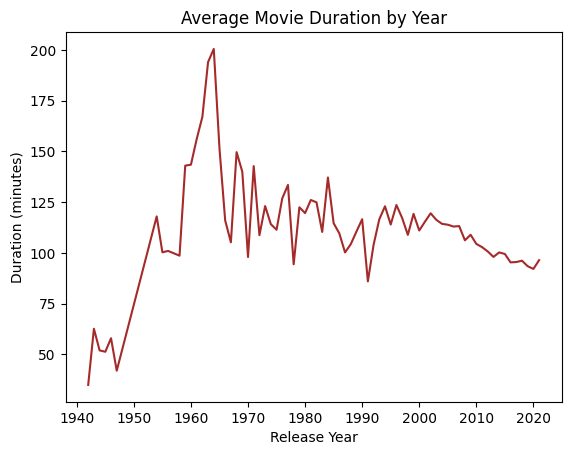

In [ ]:
movies.groupby('release_year')['duration_mins'].mean().plot(kind='line', color='brown')
plt.title("Average Movie Duration by Year")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.show()

**Insights:**
1. Average movie durations have slightly declined in recent years.
2. Viewers prefer concise storytelling that fits modern attention spans.

**Recommendation:** Experiment with shorter movie formats (60-80 minutes) to appeal binge-watch audiences.

###**5.** Content Launch Strategy

**Q18.** In which months does Netflix add the most content?

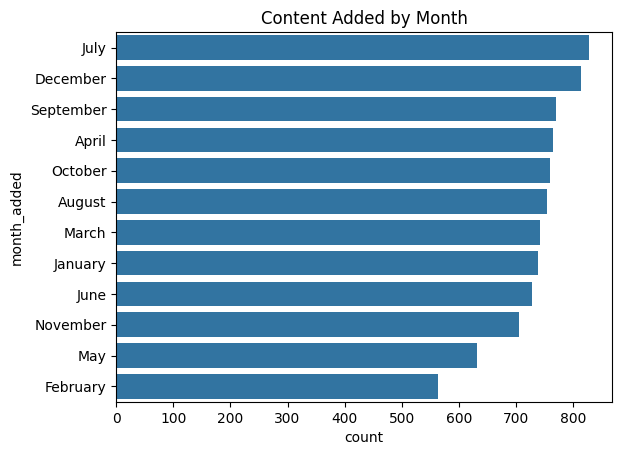

In [ ]:
sns.countplot(y='month_added', data=df, order=df['month_added'].value_counts().index)
plt.title("Content Added by Month")
plt.show()

**Insights:**
1. The months of July, September & December show spikes in content additions.
2. These months coincide with holidays and high user activity.

**Recommendation:** Schedule key releases around these months to maximize audience engagement.

**Q19.** How does the genre distribution vary across different years?

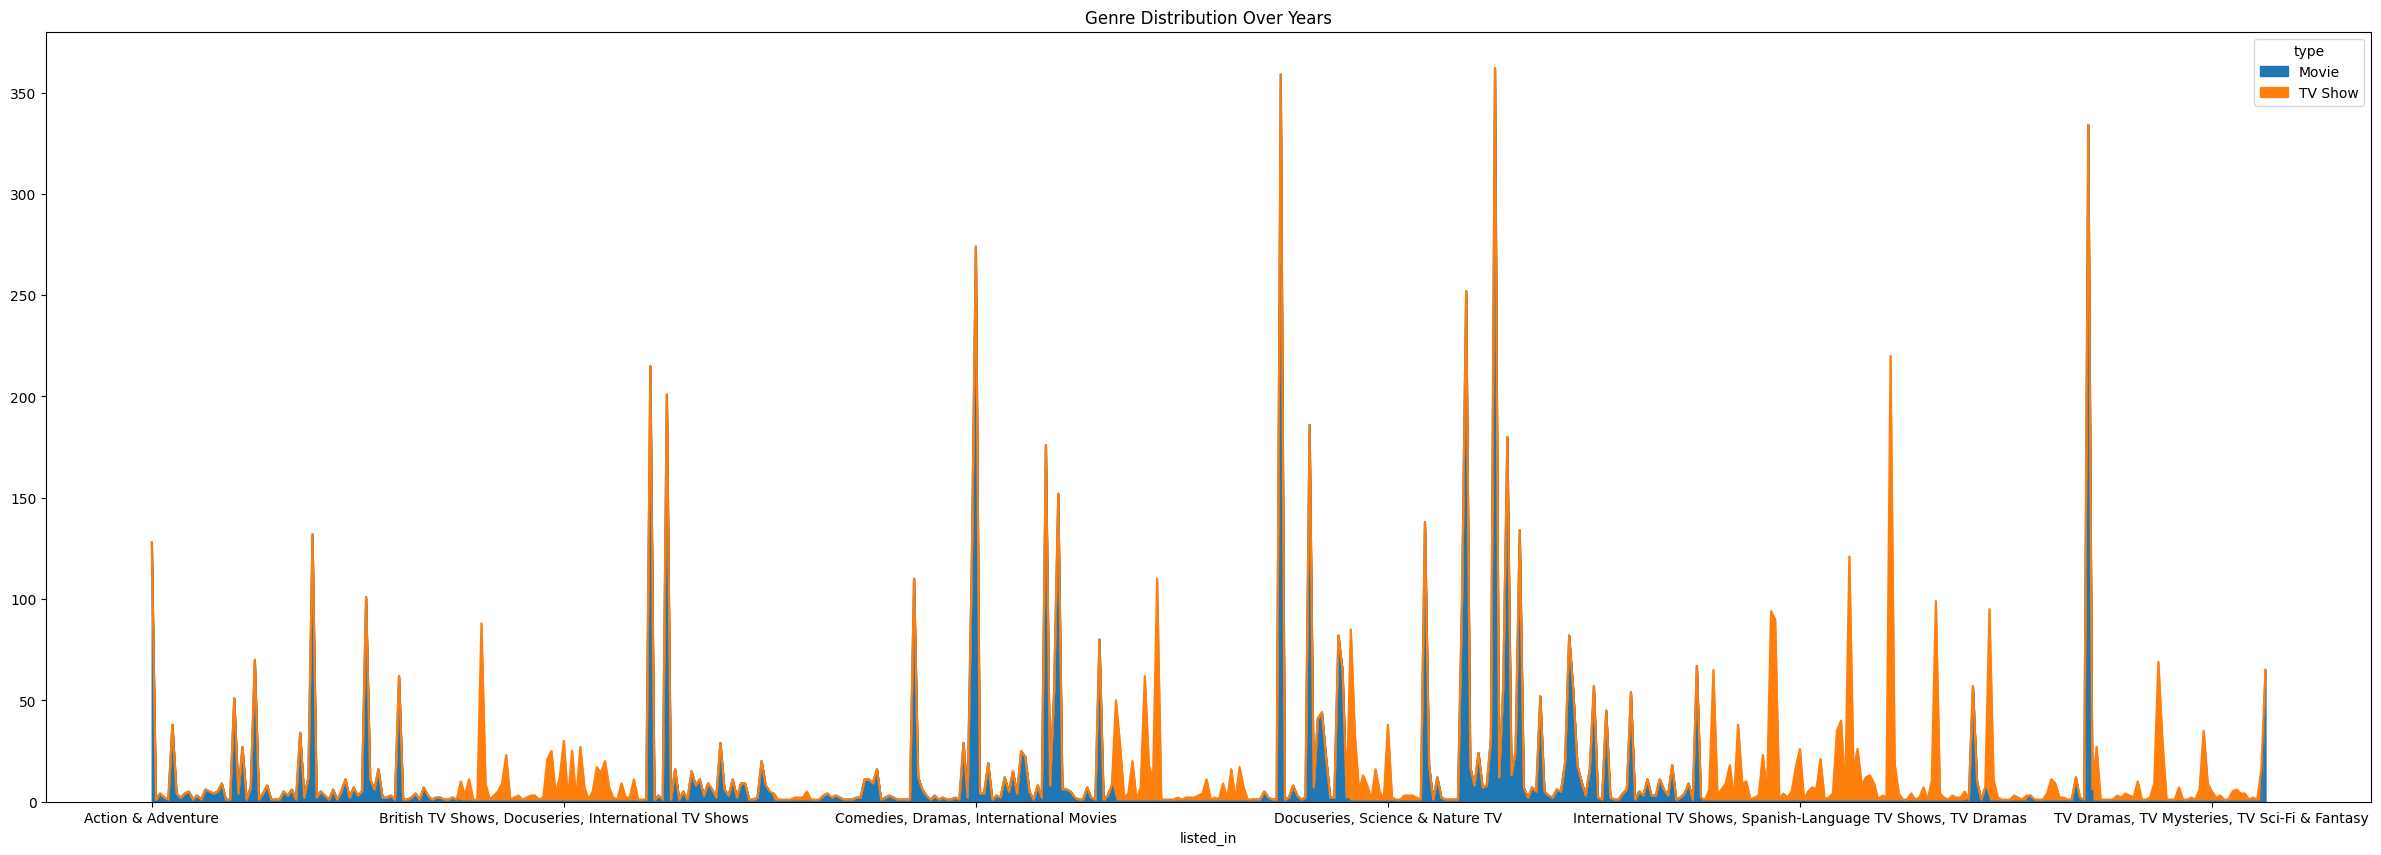

In [ ]:
genre_year = df.groupby(['listed_in','type']).size().unstack().fillna(0)
genre_year.plot(kind='area', stacked=True, figsize=(30,10))
plt.title("Genre Distribution Over Years")
plt.show()

**Insights:**
1. Docuseries & TV Drama content categories have grown rapidly year-over-year.
2. Comedy & Action genres show stable but slower growth.

**Recommendation:** Continue expanding successful categories while introducing innovative hybrid genres.

**Q20.** Which countries produce the most content in each genre?

In [ ]:
genre_country = df[['listed_in','country']].dropna()
genre_country['country_first'] = genre_country['country'].str.split(',').str[0]
top_genre_country = genre_country.value_counts(['listed_in','country_first']).head(10)
top_genre_country

,,count
listed_in,country_first,
Documentaries,United States,270
Stand-Up Comedy,United States,210
"Comedies, Dramas, International Movies",India,123
"Children & Family Movies, Comedies",United States,122
"Dramas, International Movies",India,121
"Dramas, Independent Movies, International Movies",India,118
Kids' TV,United States,104
Dramas,United States,98
Children & Family Movies,United States,96


**Insights:**
1. The U.S. leads in most genres.
2. India ranks high in Dramas and International Movies.

**Recommendation:** Leverage regional genre strengths to plan global collaborations (e.g., U.S.-India co-productions).

###**6.** Some Extra Insights

**Q1.** How has the number of movies released per year changed over the last 20-30 years?

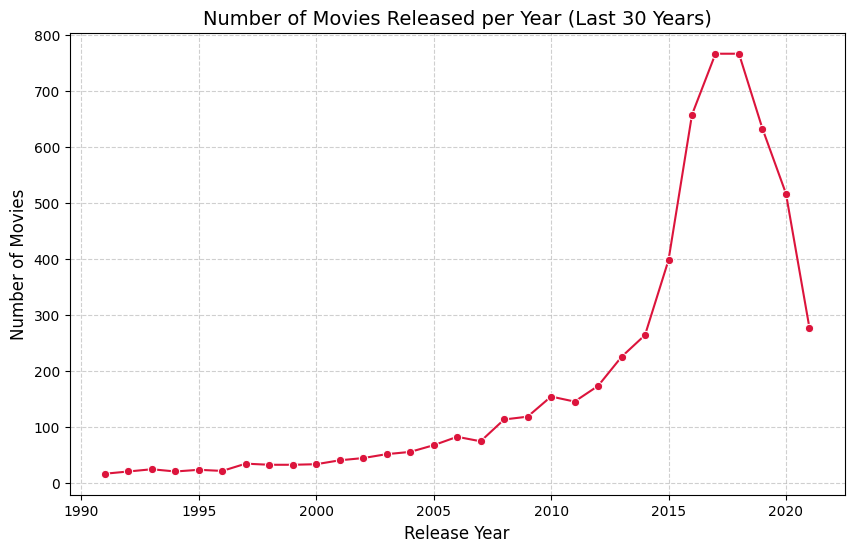

In [ ]:
# Filter only movies
movies = df[df['type'] == 'Movie']

# Consider the last 30 years of releases
latest_year = movies['release_year'].max()
movies_30yrs = movies[movies['release_year'] >= latest_year - 30]

# Group and count number of movies released per year
movie_trend = movies_30yrs['release_year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10,6))
sns.lineplot(x=movie_trend.index, y=movie_trend.values, marker='o', color='crimson')
plt.title("Number of Movies Released per Year (Last 30 Years)", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Insights:**
1. Movie releases have increased sharply since the early 1990s.
2. The trend peaks around 2015-2020 due to Netflix Originals and acquisitions.

**Recommendation:** Maintain yearly consistency in movie releases, focusing on diverse genres.

**Q2.** Comparison of TV Shows v/s Movies

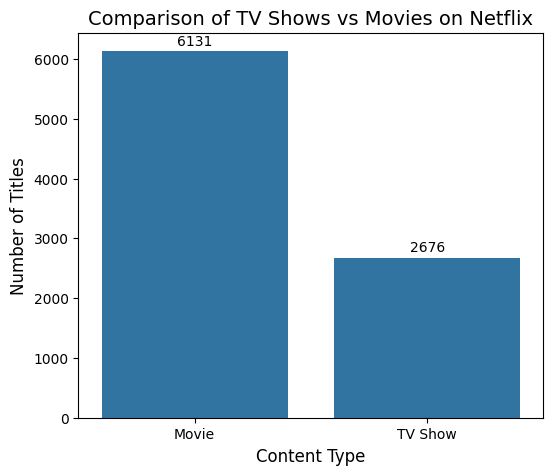

Percentage Ratio:
 type
Movie      69.62
TV Show    30.38
Name: count, dtype: float64


In [ ]:
# Count number of Movies and TV Shows
type_counts = df['type'].value_counts()

# Plot the comparison
plt.figure(figsize=(6,5))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Comparison of TV Shows vs Movies on Netflix", fontsize=14)
plt.xlabel("Content Type", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)

# Add labels on top of bars
for i, val in enumerate(type_counts.values):
    plt.text(i, val + 100, str(val), ha='center', fontsize=10)

plt.show()

# Optional: Print percentage ratio
ratio = (type_counts / type_counts.sum() * 100).round(2)
print("Percentage Ratio:\n", ratio)

**Insights:**
1. Movies form the majority of Netflix's catalog accounting for almost 70% of total titles.
2. TV Show growth indicates Netflix's shift towards series-based engagement.

**Recommendation:** Continue increasing TV Show investments to enhance subscription retention.

**Q3.** What is the best time to launch a TV show?

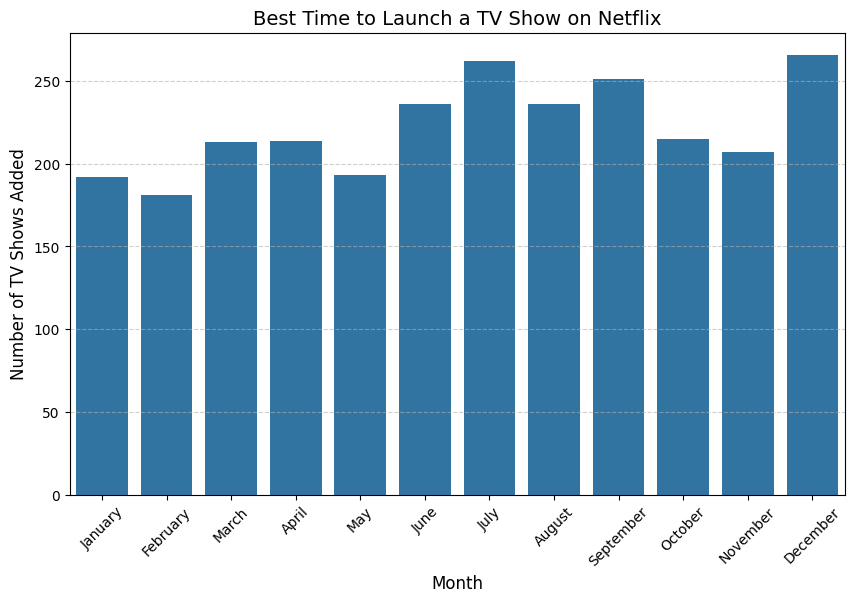

📅 The best time to launch a TV show is: December


In [ ]:
# Filter only TV Shows
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extract month from 'date_added'
tv_shows['month_added'] = tv_shows['date_added'].dt.month_name()

# Count how many TV shows were added in each month
month_wise = tv_shows['month_added'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

# Plot month-wise additions
plt.figure(figsize=(10,6))
sns.barplot(x=month_wise.index, y=month_wise.values)
plt.title("Best Time to Launch a TV Show on Netflix", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of TV Shows Added", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Print month with highest additions
best_month = month_wise.idxmax()
print(f"📅 The best time to launch a TV show is: {best_month}")


**Insights:**
1. The highest number of TV Shows are typically added in July & December.
2. These months correspond to holidays and high viewing activity.

**Recommendation:** Prioritize releasing flagship TV series during these months for maximum impact.

**Q4.** Does Netflix has more focus on TV Shows than movies in recent years?

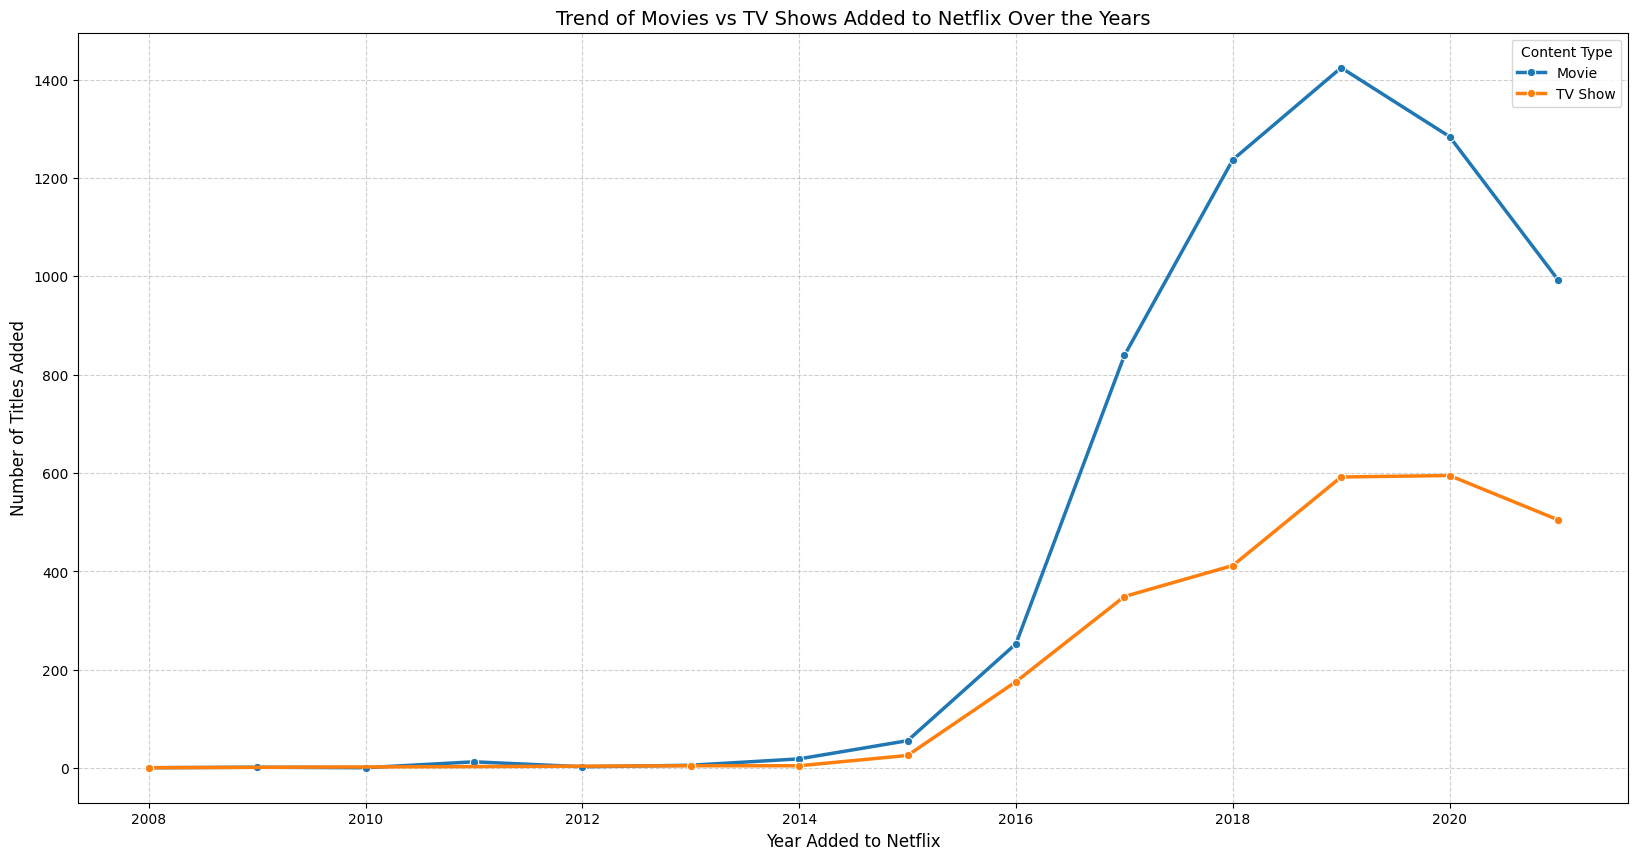

In [ ]:
# Extract year of addition to Netflix
df['year_added'] = df['date_added'].dt.year

# Group by year and content type (Movie / TV Show)
trend = df.groupby(['year_added', 'type']).size().reset_index(name='count')

# Remove missing year data
trend = trend.dropna(subset=['year_added'])

# Plot the trend
plt.figure(figsize=(20,10))
sns.lineplot(data=trend, x='year_added', y='count', hue='type', marker='o', linewidth=2.5)
plt.title("Trend of Movies vs TV Shows Added to Netflix Over the Years", fontsize=14)
plt.xlabel("Year Added to Netflix", fontsize=12)
plt.ylabel("Number of Titles Added", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Content Type")
plt.show()

**Insights:**
1. Up until 2015, Netflix focused heavily on Movies. But, from 2016 onwards, the number of TV Shows added per year has grown rapidly.
2. This reflects Netflix's pivot toward long-term viewer engagement.

**Recommendation:** Maintain a balanced mix of both formats to cater to all audience types.

**Q5.** Understanding what content is available in different countries.

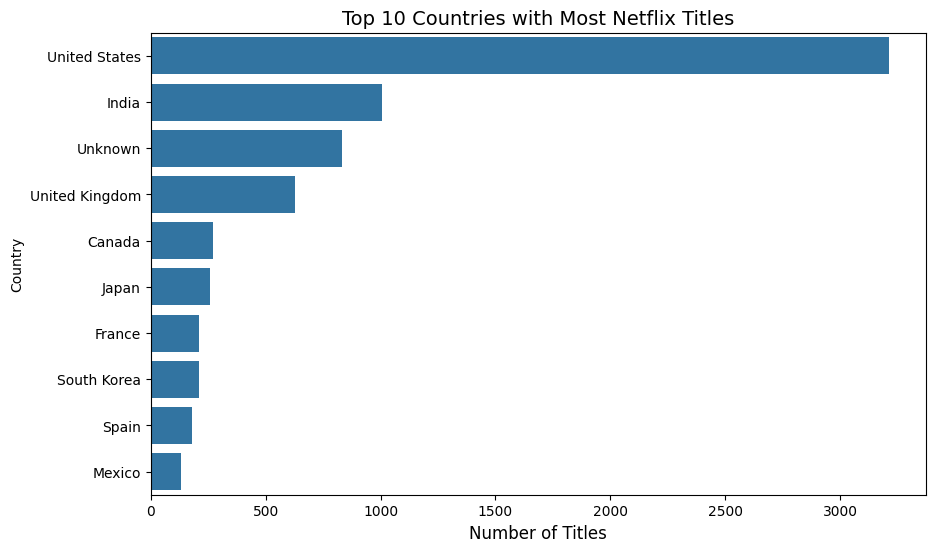

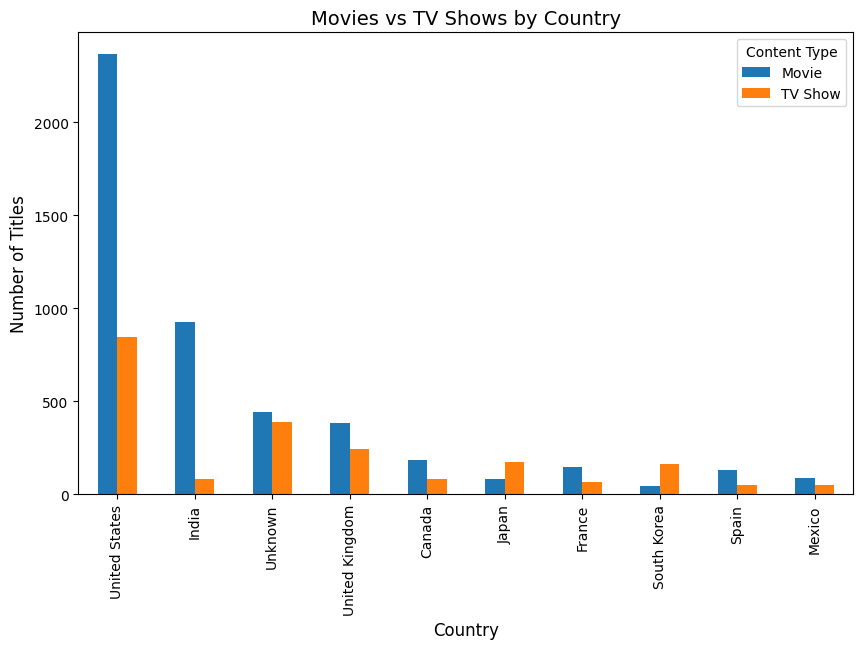

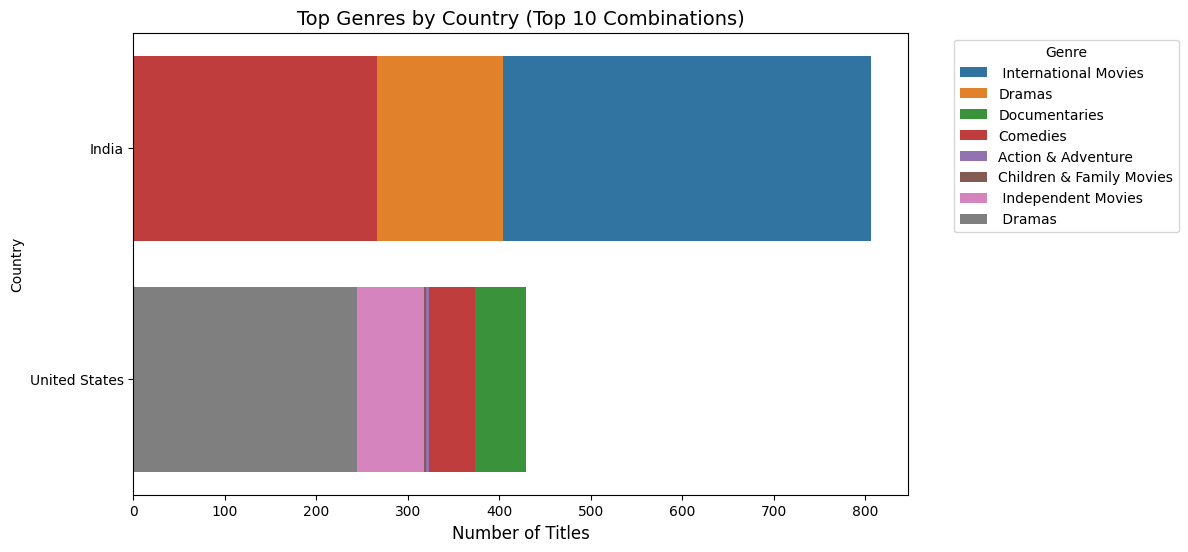

In [ ]:
# Clean and prepare country data
df['country'] = df['country'].fillna('Unknown')
df['country_first'] = df['country'].str.split(',').str[0].str.strip()

# -------------------------------
# 1️⃣ Top 10 Countries by Total Titles
# -------------------------------
top_countries = df['country_first'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Netflix Titles", fontsize=14)
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Country")
plt.show()

# -------------------------------
# 2️⃣ Movies vs TV Shows by Country
# -------------------------------
country_type = df.groupby(['country_first', 'type']).size().unstack().fillna(0)
top_country_type = country_type.loc[top_countries.index]

top_country_type.plot(kind='bar', figsize=(10,6))
plt.title("Movies vs TV Shows by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.legend(title="Content Type")
plt.show()

# -------------------------------
# 3️⃣ (Optional Bonus) Top Genres by Country
# -------------------------------
# Split and explode genres to handle multiple entries
df['listed_in'] = df['listed_in'].fillna('')
country_genre = df.assign(Genre=df['listed_in'].str.split(',')).explode('Genre')
top_genre_country = (
    country_genre.groupby(['country_first','Genre']).size()
    .reset_index(name='count')
)

# Top 10 country-genre combinations
top_genre_country = top_genre_country.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='count', y='country_first', hue='Genre', data=top_genre_country, dodge=False)
plt.title("Top Genres by Country (Top 10 Combinations)", fontsize=14)
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Country")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insights:**
1. The U.S., India, and the U.K. host the highest number of titles.
2. Regional markets like Japan and South Korea excel in niche genres such as Anime and K-Dramas.

**Recommendation:** Strengthen content localization strategies by promoting region-specific genres and languages.